## Hello Kaggler!
### Objective of this kernal is to explore basic visualizations using Titanic dataset

## Table of contents

1. [Null Value Visualization](#1)
1. [Target (Survival) Visualization](#2)
1. [Feature Visualizations](#3)
    * [Sex](#3_1)
    * [Pclass](#3_2)
    * [Age](#3_3)
    * [Embarked](#3_4)
    * [SibSip & Parch](#3_5)
    * [Fare](#3_6)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

data=pd.read_csv('../input/train.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Null Value Visualization[^](#1)<a id="1" ></a><br>

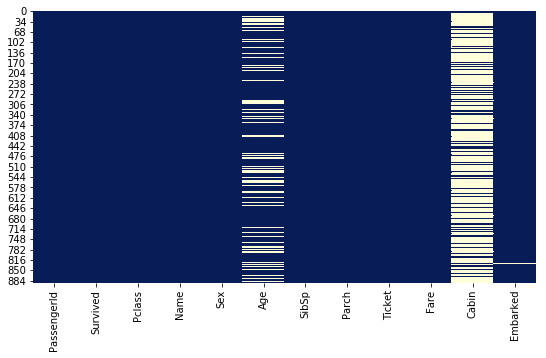

In [3]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [4]:
total = data.isnull().sum().sort_values(ascending = False)
percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)
temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
temp

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


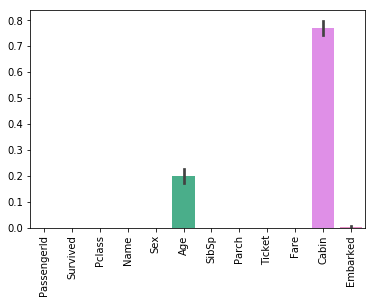

In [5]:
ax = sns.barplot(data=data.isnull())
plt.xticks(rotation=90);

### Column : Survival[^](#2)<a id="2" ></a><br>

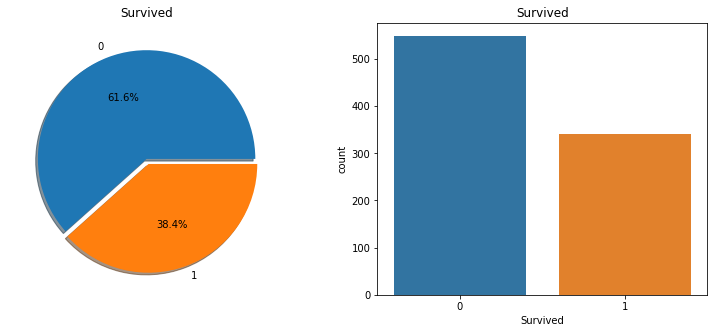

In [6]:
 f,ax=plt.subplots(1,2,figsize=(13,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Feature: Sex[^](#3_1)<a id="3_1" ></a><br>

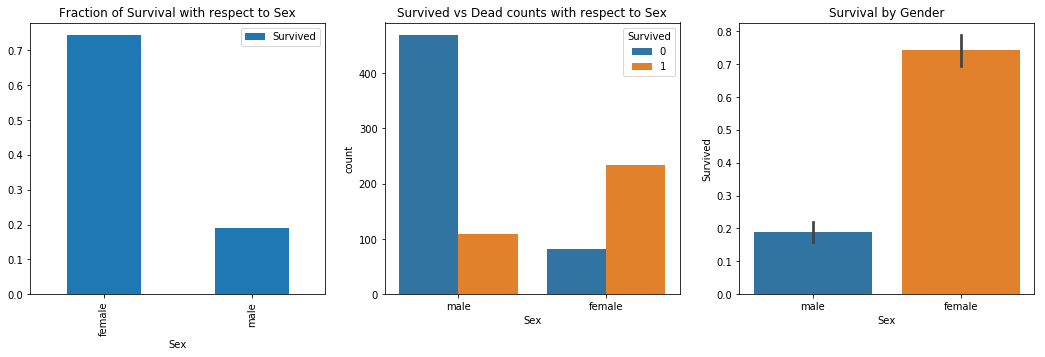

In [7]:
f,ax=plt.subplots(1,3,figsize=(18,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fraction of Survival with respect to Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Sex')
sns.barplot(x="Sex", y="Survived", data=data,ax=ax[2])
ax[2].set_title('Survival by Gender')
plt.show()

### Feature: Pclass[^](#3_2)<a id="3_2" ></a><br>

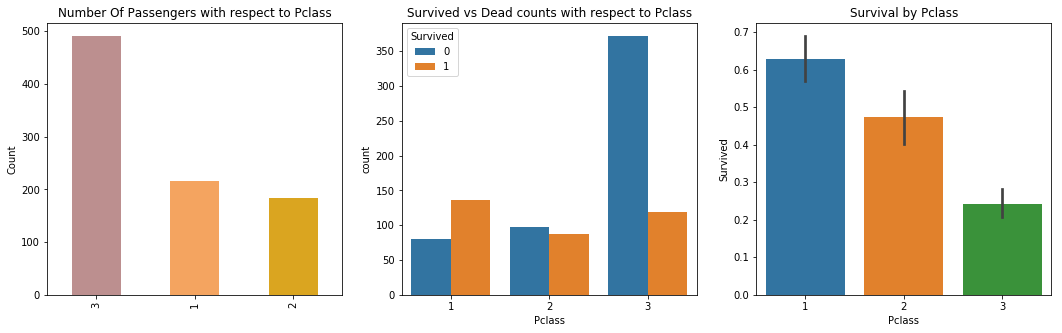

In [8]:
f,ax=plt.subplots(1,3,figsize=(18,5))
data['Pclass'].value_counts().plot.bar(color=['#BC8F8F','#F4A460','#DAA520'],ax=ax[0])
ax[0].set_title('Number Of Passengers with respect to Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Pclass')
sns.barplot(x="Pclass", y="Survived", data=data,ax=ax[2])
ax[2].set_title('Survival by Pclass')
plt.show()

### Feature: Age[^](#3_3)<a id="3_3" ></a><br>

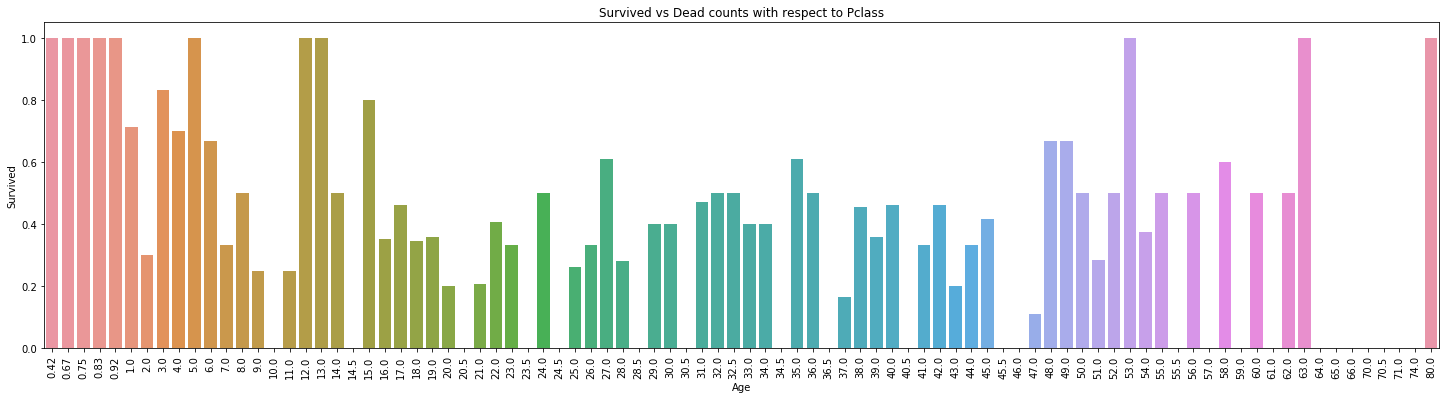

In [9]:
f,ax=plt.subplots(1,1,figsize=(25,6))
sns.barplot(data['Age'],data['Survived'], ci=None, ax=ax)
ax.set_title('Survived vs Dead counts with respect to Pclass')
plt.xticks(rotation=90);
plt.show()

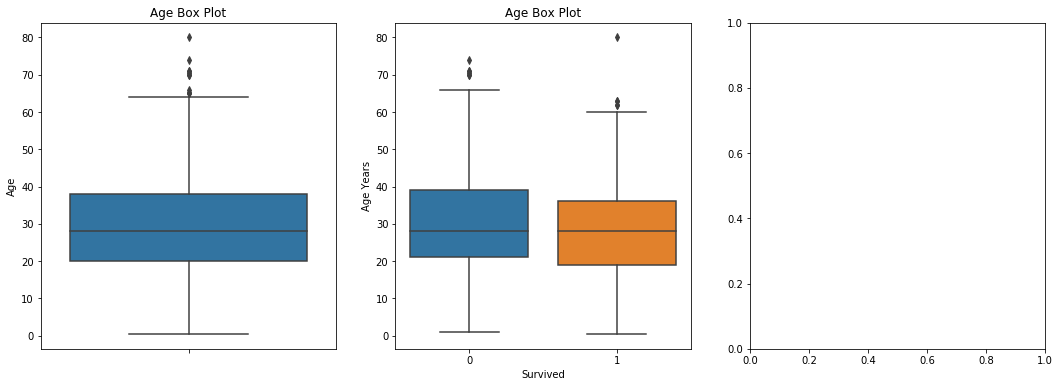

In [10]:
f,ax=plt.subplots(1,3,figsize=(18,6))

#data.boxplot(column=['Age'],ax=ax[0], grid=False)
ax[0].set_title('Age Box Plot')
ax[0].set_ylabel('Age Years')

sns.boxplot(y='Age', data=data, ax=ax[0])


sns.boxplot(x='Survived', y='Age', data=data, ax=ax[1])
ax[1].set_title('Age Box Plot')
ax[1].set_ylabel('Age Years')



plt.show()

### Feature: Embarked[^](#3_4)<a id="3_4" ></a><br>

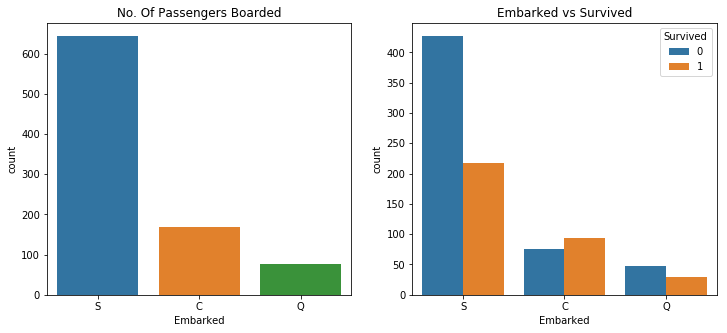

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot('Embarked',data=data,ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

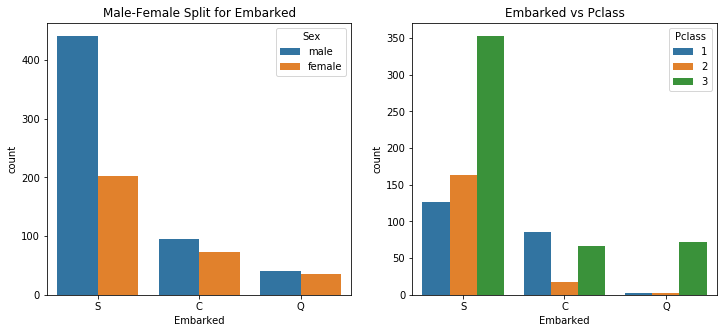

In [12]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0])
ax[0].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Features: SibSip & Parch[^](#3_5)<a id="3_5" ></a><br>

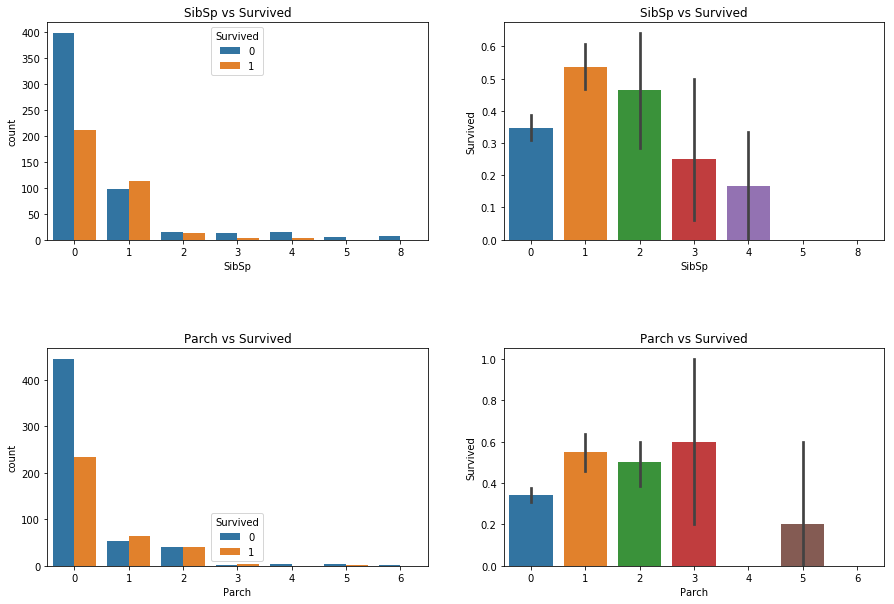

In [13]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot('SibSp',hue='Survived',data=data,ax=ax[0,0])
ax[0,0].set_title('SibSp vs Survived')
sns.barplot('SibSp','Survived',data=data,ax=ax[0,1])
ax[0,1].set_title('SibSp vs Survived')

sns.countplot('Parch',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Parch vs Survived')
sns.barplot('Parch','Survived',data=data,ax=ax[1,1])
ax[1,1].set_title('Parch vs Survived')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Feature: Fare[^](#3_6)<a id="3_6" ></a><br>

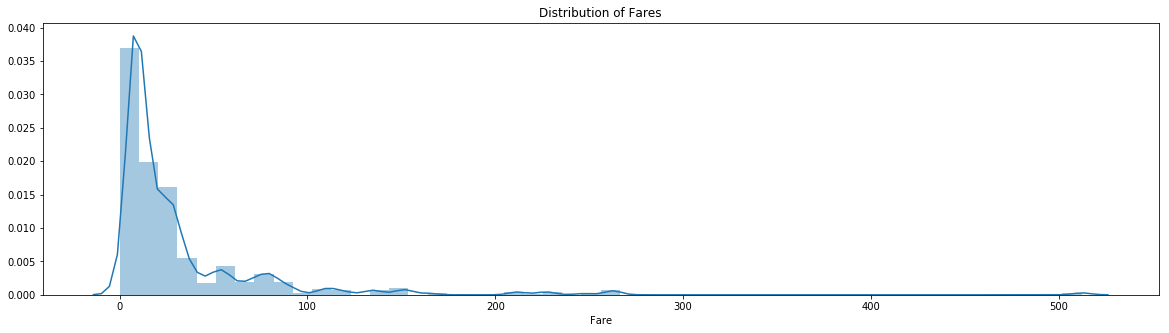

In [14]:
f,ax=plt.subplots(1,1,figsize=(20,5))
sns.distplot(data.Fare,ax=ax)
ax.set_title('Distribution of Fares')
plt.show()